In [58]:
library(tidyr)
library(ggplot2)

In [59]:
folder_D11 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/"
folder_D30 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/"
folder_D52_NONE = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/"
folder_D52_ROT = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/"

In [60]:
celltypes = c("FPP","P_FPP")
files_d11 = paste0(folder_D11,'celltype_',celltypes,'/top_qtl_results_all.txt')
#
celltypes = c("Astro","DA","Sert","Epen1")
files_d30 = paste0(folder_D30,'celltype_',celltypes,'/top_qtl_results_all.txt')
#
celltypes = c("DA","Sert","Epen1","Astro")
files_d52_none = paste0(folder_D52_NONE,"celltype_",celltypes,"/top_qtl_results_all.txt")
files_d52_rot = paste0(folder_D52_ROT,"celltype_",celltypes,"/top_qtl_results_all.txt")
neuro_files = c(files_d11, files_d30,files_d52_none, files_d52_rot)
neuro_files

[1] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/celltype_FPP/top_qtl_results_all.txt"                                           
 [2] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/celltype_P_FPP/top_qtl_results_all.txt"                                         
 [3] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Astro/top_qtl_results_all.txt"                                         
 [4] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/top_qtl_results_all.txt"                                            
 [5] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Sert/top_qtl_results_all.txt"                                          
 [6] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Epen1/top_qtl_results_all.txt"                                         
 [7] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/top_qtl_results_all.txt"     
 [8] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_Sert/top_qtl_results_all.txt"   
 [9] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_Epen1/top_qtl_results_all.txt"  
[10] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_Astro/top_qtl_results_all.txt"  
[11] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/celltype_DA/top_qtl_results_all.txt"   
[12] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/celltype_Sert/top_qtl_results_all.txt" 
[13] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/celltype_Epen1/top_qtl_results_all.txt"
[14] "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/celltype_Astro/top_qtl_results_all.txt"

In [61]:
eqtl_maps = c("FPP_D11","P_FPP_D11",
             "FPP_D30","DA_D30","Sert_D30","Epen1_D30",
             "DA_D52","Sert_D52","Epen1_D52","Astro_D52",
             "DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT")

In [62]:
#### GTEx files

In [63]:
gtex_folder = "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/"
head(list.files(gtex_folder,".egenes.txt"))

[1] "Adipose_Subcutaneous.v7.egenes.txt"    
[2] "Adipose_Visceral_Omentum.v7.egenes.txt"
[3] "Adrenal_Gland.v7.egenes.txt"           
[4] "Artery_Aorta.v7.egenes.txt"            
[5] "Artery_Coronary.v7.egenes.txt"         
[6] "Artery_Tibial.v7.egenes.txt"

In [64]:
files = paste0(gtex_folder, list.files(gtex_folder,".egenes.txt"))
length(files)
head(files,2)

[1] 48

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Adipose_Subcutaneous.v7.egenes.txt"    
[2] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Adipose_Visceral_Omentum.v7.egenes.txt"

In [65]:
## Select files corresponding to GTEx brain tissues

In [66]:
brain_files = files[grep("Brain",files)]
head(brain_files,2)
length(brain_files)

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Amygdala.v7.egenes.txt"                      
[2] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Anterior_cingulate_cortex_BA24.v7.egenes.txt"

[1] 13

In [67]:
mat = matrix(0, nrow = 13, ncol = 14)
colnames(mat) = eqtl_maps
rownames(mat) = gsub("/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/","",
                     gsub(".v7.egenes.txt","",brain_files))
mat

,FPP_D11,P_FPP_D11,FPP_D30,DA_D30,Sert_D30,Epen1_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52,DA_D52_ROT,Sert_D52_ROT,Epen1_D52_ROT,Astro_D52_ROT
Brain_Amygdala,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Anterior_cingulate_cortex_BA24,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Caudate_basal_ganglia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Cerebellar_Hemisphere,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Cerebellum,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Cortex,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Frontal_Cortex_BA9,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Hippocampus,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Hypothalamus,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brain_Nucleus_accumbens_basal_ganglia,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
length(files)

[1] 48

In [69]:
i = 0
for (brain_file in brain_files){
    i = i+1
    j = 0
    df = read.csv(brain_file, sep ="\t")
    df$feature_id = gsub("\\..*","",df$gene_id)
    df$snp_id = gsub("_b37","",df$variant_id)
    df_sign = df[df$qval<0.05,]
    egenes = unique(df_sign$feature_id)
    for (neuro_file in neuro_files){
        j = j+1
        df0 = read.csv(neuro_file, sep = "\t")
        genes = unique(as.character(df0$feature_id))
        mat[i,j] = length(egenes[egenes %in% genes])/length(egenes)   
    }
}

In [70]:
mat

,FPP_D11,P_FPP_D11,FPP_D30,DA_D30,Sert_D30,Epen1_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52,DA_D52_ROT,Sert_D52_ROT,Epen1_D52_ROT,Astro_D52_ROT
Brain_Amygdala,0.4540153,0.4567070,0.4706146,0.4333782,0.4827277,0.5015702,0.4786900,0.5002243,0.4957380,0.4688201,0.4786900,0.5002243,0.4957380,0.4688201
Brain_Anterior_cingulate_cortex_BA24,0.4786741,0.4823300,0.4993907,0.4582013,0.5076773,0.5266878,0.5062150,0.5276627,0.5205947,0.4925664,0.5062150,0.5276627,0.5205947,0.4925664
Brain_Caudate_basal_ganglia,0.4743860,0.4796491,0.4977193,0.4535088,0.5061404,0.5271930,0.5015789,0.5212281,0.5217544,0.4938596,0.5015789,0.5212281,0.5217544,0.4938596
Brain_Cerebellar_Hemisphere,0.4907824,0.4936856,0.5137175,0.4787342,0.5205400,0.5430396,0.5219916,0.5379591,0.5338946,0.5076208,0.5219916,0.5379591,0.5338946,0.5076208
Brain_Cerebellum,0.5121604,0.5171432,0.5356507,0.4982797,0.5418199,0.5645984,0.5435995,0.5580733,0.5539210,0.5294816,0.5435995,0.5580733,0.5539210,0.5294816
Brain_Cortex,0.4902376,0.4913765,0.5091116,0.4668077,0.5169216,0.5398633,0.5135047,0.5344940,0.5307517,0.5043931,0.5135047,0.5344940,0.5307517,0.5043931
Brain_Frontal_Cortex_BA9,0.4919387,0.4946913,0.5147464,0.4685411,0.5233976,0.5460087,0.5198584,0.5414864,0.5381439,0.5090444,0.5198584,0.5414864,0.5381439,0.5090444
Brain_Hippocampus,0.4570815,0.4601471,0.4816064,0.4429798,0.4892704,0.5141018,0.4862048,0.5110362,0.5070509,0.4776211,0.4862048,0.5110362,0.5070509,0.4776211
Brain_Hypothalamus,0.4410140,0.4462138,0.4598635,0.4192395,0.4679883,0.4913877,0.4670133,0.4871628,0.4826129,0.4510887,0.4670133,0.4871628,0.4826129,0.4510887
Brain_Nucleus_accumbens_basal_ganglia,0.4671747,0.4718640,0.4888628,0.4419695,0.4978507,0.5181712,0.4935522,0.5146542,0.5099648,0.4800703,0.4935522,0.5146542,0.5099648,0.4800703


In [71]:
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

CellType,Sharing
FPP_D11,0.4540153
FPP_D11,0.4786741


In [72]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

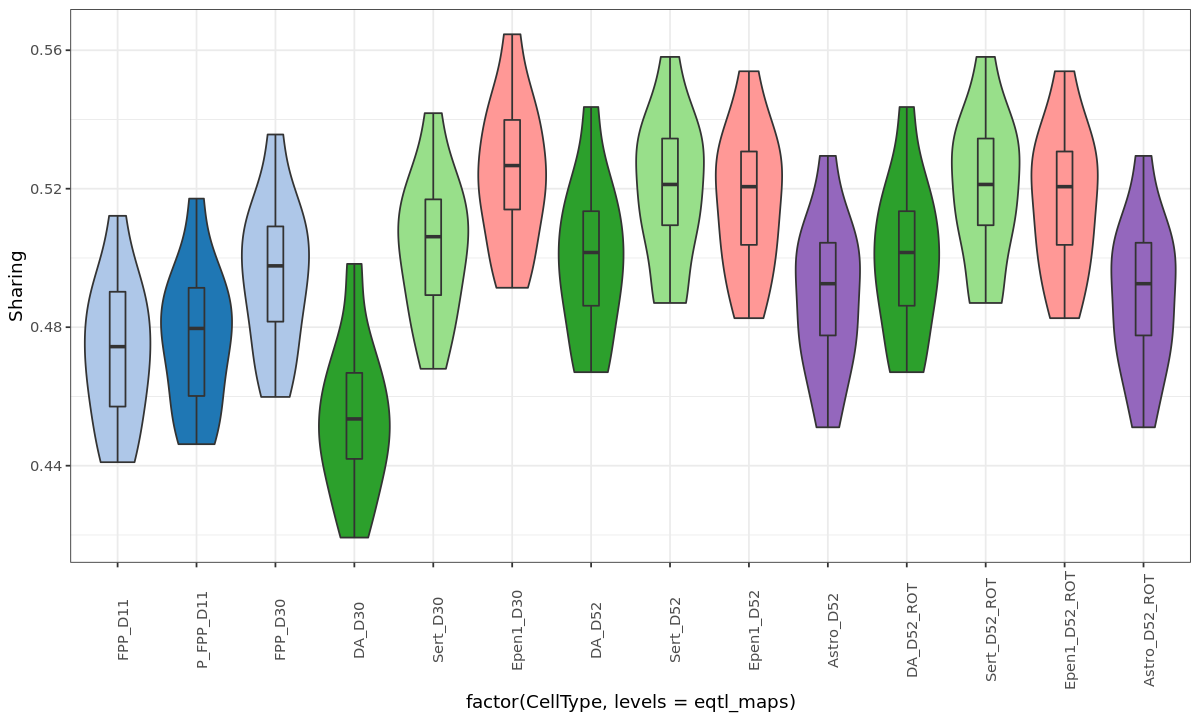

In [73]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(df,aes(x=factor(CellType, levels=eqtl_maps), 
              y=Sharing, 
              fill=factor(CellType, levels=eqtl_maps))) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + 
                            theme(legend.position = "none", axis.text.x = element_text(angle = 90)) 

In [74]:
write.csv(mat, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/gtex_brain_egenes_assessed_fraction.txt")

In [75]:
mat2 = mat

In [76]:
i = 0
for (brain_file in brain_files){
    i = i+1
    j = 0
    df = read.csv(brain_file, sep ="\t")
    df$feature_id = gsub("\\..*","",df$gene_id)
    df$snp_id = gsub("_b37","",df$variant_id)
    df_sign = df[df$qval<0.05,]
    egenes = unique(df_sign$feature_id)
    for (neuro_file in neuro_files){
        j = j+1
        df0 = read.csv(neuro_file, sep = "\t")
        genes = unique(as.character(df0$feature_id))
        mat2[i,j] = length(egenes[egenes %in% genes])  
    }
}

In [78]:
mat2

,FPP_D11,P_FPP_D11,FPP_D30,DA_D30,Sert_D30,Epen1_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52,DA_D52_ROT,Sert_D52_ROT,Epen1_D52_ROT,Astro_D52_ROT
Brain_Amygdala,1012,1018,1049,966,1076,1118,1067,1115,1105,1045,1067,1115,1105,1045
Brain_Anterior_cingulate_cortex_BA24,1964,1979,2049,1880,2083,2161,2077,2165,2136,2021,2077,2165,2136,2021
Brain_Caudate_basal_ganglia,2704,2734,2837,2585,2885,3005,2859,2971,2974,2815,2859,2971,2974,2815
Brain_Cerebellar_Hemisphere,3381,3401,3539,3298,3586,3741,3596,3706,3678,3497,3596,3706,3678,3497
Brain_Cerebellum,4317,4359,4515,4200,4567,4759,4582,4704,4669,4463,4582,4704,4669,4463
Brain_Cortex,3013,3020,3129,2869,3177,3318,3156,3285,3262,3100,3156,3285,3262,3100
Brain_Frontal_Cortex_BA9,2502,2516,2618,2383,2662,2777,2644,2754,2737,2589,2644,2754,2737,2589
Brain_Hippocampus,1491,1501,1571,1445,1596,1677,1586,1667,1654,1558,1586,1667,1654,1558
Brain_Hypothalamus,1357,1373,1415,1290,1440,1512,1437,1499,1485,1388,1437,1499,1485,1388
Brain_Nucleus_accumbens_basal_ganglia,2391,2415,2502,2262,2548,2652,2526,2634,2610,2457,2526,2634,2610,2457


In [79]:
write.csv(mat2, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/gtex_brain_egenes_assessed.txt")